In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from struct import unpack
%matplotlib inline

In [22]:
bod_num=[]
mass=[]
time=[]
ax=[]
ex=[]
inc=[]
x=[]
y=[]
z=[]



with open("/Users/aribakhan/Documents/BH_nbody/OutputData/May22/bout.bin", "rb") as f:
    num=17 #number of columns
    vals=[1,2,3,4,5]
    while len(vals)>0:
        vals = f.read(4*num)
        if len(vals)>0:
            bod_num.append(unpack('f'*num,vals)[1])
            mass.append(unpack('f'*num,vals)[2])
            time.append(unpack('f'*num,vals)[3])
            ax.append(unpack('f'*num,vals)[4])
            ex.append(unpack('f'*num,vals)[5])
            inc.append(unpack('f'*num,vals)[6])
            x.append(unpack('f'*num,vals)[10])
            y.append(unpack('f'*num,vals)[11])
            z.append(unpack('f'*num,vals)[12])
        if unpack('f'*num,vals)[3]>1e7:
            break
            
r = [np.sqrt(x**2+y**2+z**2) for x,y,z in zip(x,y,z)]

blackhole_data = pd.DataFrame(
    {'Body Number': bod_num,
     'Mass': mass,
     'Time': time,
     'Major Axis': ax,
     'Eccentricity': ex,
     'Inclination': inc,
     'X Position': x,
     'Y Position': y,
     'Z Position': z,
     'Radius': r
    })

In [23]:
import pickle
base_dir = '/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/'
with open(base_dir + 'blackholeData.pickle', 'wb') as f:
            pickle.dump(blackhole_data, f)

In [25]:
datafilename = '/Users/aribakhan/Desktop/Sonification_Data/datamovies-master/blackholeData.pickle'
blackhole_data =  pd.read_pickle(datafilename)
print(blackhole_data[0:5])

   Body Number  Mass      Time  Major Axis  Eccentricity  Inclination  \
0          0.0  40.0  0.961617  500.000153      0.051502     0.004999   
1          1.0  40.0  0.961617  532.391479      0.032007     0.078029   
2          2.0  40.0  0.961617  566.881348      0.018161     0.007917   
3          3.0  40.0  0.961617  603.605652      0.027264     0.062389   
4          4.0  40.0  0.961617  642.708923      0.017914     0.066380   

   X Position  Y Position  Z Position      Radius  
0 -163.117371 -499.404175   -0.043571  525.368260  
1 -522.738770   35.323952    0.048106  523.930916  
2   53.479282 -555.452454   -0.076755  558.021028  
3  -78.932930 -595.690186   -0.648642  600.897350  
4  424.524689  486.088654    0.563164  645.370984  


In [88]:
#specifiy time from 
new_blackhole_data = blackhole_data.loc[(blackhole_data['Time'] >= 980*365.2) & (blackhole_data['Time'] <= 1050*365.2)]
print(new_blackhole_data)

         Body Number  Mass          Time  Major Axis  Eccentricity  \
1566530          0.0  40.0  357896.15625  515.010071      0.002673   
1566531          1.0  40.0  357896.15625  554.201721      0.000750   
1566532          2.0  40.0  357896.15625  593.360962      0.000226   
1566533          3.0  40.0  357896.15625  626.412231      0.000968   
1566534          4.0  40.0  357896.15625  653.605225      0.001609   
1566535          5.0  40.0  357896.15625  672.814880      0.002666   
1566536          6.0  40.0  357896.15625  687.295227      0.004497   
1566537          7.0  40.0  357896.15625  701.942993      0.001874   
1566538          8.0  40.0  357896.15625  719.215210      0.002534   
1566539          9.0  40.0  357896.15625  731.584839      0.000703   
1566540          0.0  40.0  357897.68750  515.010193      0.002673   
1566541          1.0  40.0  357897.68750  554.201660      0.000750   
1566542          2.0  40.0  357897.68750  593.361328      0.000226   
1566543          3.0

In [89]:
time = new_blackhole_data.Time
radius = new_blackhole_data.Radius

data_dict = {}
data_dict['time'] = time


data_dict['radius'] = radius

In [90]:
end = len(time)-1
ind_end = 1566530 + end
duration_data = time[ind_end]
print('data duration = ', str(duration_data))
t_start = 0
t_end = time[ind_end] 
n_notes = 100
times = np.linspace(t_start,t_end,n_notes)

# stretch or shrink time, for the duration of the score-- 
# but you'll see why we need to keep the original times... 

stretch = 0.2
times_sco = times*stretch
print('score duration = ', str(times_sco[-1]))
dt = times_sco[2]-times_sco[1]
print(dt)

data duration =  383456.625
score duration =  76691.325
774.6598484848486


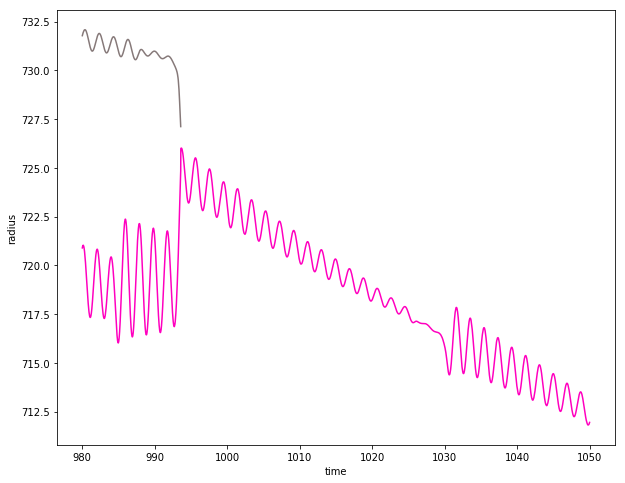

In [71]:
fig = plt.figure(figsize=(10,8))
colors = [(1, 0, 0), (1, 0.749, 0), (1, 1, 0), (0.749, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1),(0.749, 0, 1), (1, 0, 0.749),(0.525, 0.475, 0.475)]
colors = np.array(colors)

for i in [8,9]: 
    time = new_blackhole_data.loc[new_blackhole_data['Body Number'] == i, 'Time']
    radius = new_blackhole_data.loc[new_blackhole_data['Body Number'] == i, 'Radius']
    plt.plot(time/365.2,radius,c=colors[i],label="%d"%i)
plt.xlabel('time')
plt.ylabel('radius') 

plt.show()

In [91]:
time = np.asarray(time)
radius = np.asarray(radius)

radius_data_range = np.linspace(min(radius),max(radius),40) # the number of points doesnt matter here ! 
f_min = 220.
f_max = 800.
freq_range = np.linspace(f_min,f_max,40)

r_f = np.interp(radius,radius_data_range,freq_range)
print(radius[0:10])
print(r_f[0:10])

[515.91618779 553.87836486 593.39376171 627.00927008 653.49665042
 674.55595411 684.31382924 700.74384756 720.89669521 731.78252506]
[226.03939295 326.83261689 431.74978845 521.00218981 591.32872702
 647.24319972 673.15129482 716.7745705  770.28231542 799.18523855]


In [92]:
print('Pitches', pitches[0:10])
print('TIMES',times[0:10])
print('TIME', time[0:10])
print('FREQ_RANGE', r_f[0:10])
pitches = np.interp(times, time,r_f)


Pitches [764.19327622 764.19327622 764.19327622 764.19327622 764.19327622
 764.19327622 764.19327622 764.19327622 764.19327622 764.19327622]
TIMES [    0.          3873.29924242  7746.59848485 11619.89772727
 15493.1969697  19366.49621212 23239.79545455 27113.09469697
 30986.39393939 34859.69318182]
TIME [357896.15625 357896.15625 357896.15625 357896.15625 357896.15625
 357896.15625 357896.15625 357896.15625 357896.15625 357896.15625]
FREQ_RANGE [226.03939295 326.83261689 431.74978845 521.00218981 591.32872702
 647.24319972 673.15129482 716.7745705  770.28231542 799.18523855]


Text(0, 0.5, 'pitches (Radius)')

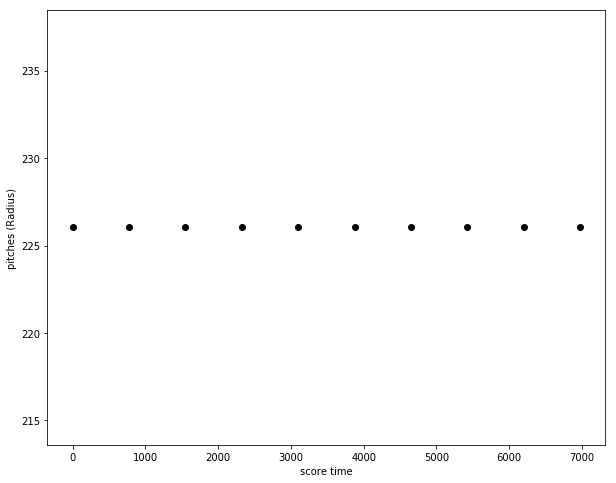

In [101]:
fig = plt.figure(figsize=(10,8))
time_tmp = np.linspace(times_sco[0],times_sco[-1],len(r_f))
plt.plot(time_tmp[0:10],r_f[0:10],'r-')
#plt.plot(times_sco[0:10],pitches[0:10],'ko')
#for ind,t in enumerate(times_sco):
#plt.plot([t,t],[f_min,pitches[ind]],'k-', linewidth=0.5)
    
plt.xlabel('score time')
plt.ylabel('pitches (Radius)')

In [99]:
print(np.shape(time_tmp))
print(np.shape(r_f))

(63940,)
(63940,)
